In [1]:
# read top 10 states

import pickle
import numpy as np

with open('top_locations.dat', 'rb') as f:
# with open('top10reason.dat') as f:
    state_top10 = pickle.load(f)
f.close()
# for (i,s) in enumerate(state_top10):
#     state_top10[i] = s.replace('"','')

In [15]:
# foursquare

file = 'auc_location_new_10fold_fsq3.dat'

with open(file, 'rb') as f:
    aucs, confs, labels = pickle.load(f)
f.close()
    
auc_top10 = list(np.array([]) for ii in range(len(state_top10)))
conf_top10_foursquare = list([np.array([]) for iii in range(len(state_top10))] for ii in range(len(state_top10)))
for (k,lab) in enumerate(labels):
    for (j,state) in enumerate(state_top10):
        if state in lab:
            ind = np.where(lab==state)[0]
            auc_top10[j] = np.append(auc_top10[j], aucs[k][ind])
            for (j2,state2) in enumerate(state_top10):
                if state2 in lab:
                    ind2 = np.where(lab==state2)[0]
                    conf_top10_foursquare[j][j2] = np.append(conf_top10_foursquare[j][j2], confs[k][ind,ind2])

auc_mean_fsq = np.array([])
auc_ci_fsq = np.array([])
auc_std_fsq = np.array([])
auc_all = np.array([])
for (j, a) in enumerate(auc_top10):
    auc_mean_fsq = np.append(auc_mean_fsq, np.nanmean(a))
    auc_ci_fsq = np.append(auc_ci_fsq, 2*np.nanstd(a)/np.sqrt(len(labels)))
    auc_std_fsq = np.append(auc_std_fsq, np.nanstd(a))
    auc_all = np.append(auc_all, a, axis=0)

aucall_mean_fsq = np.nanmean(auc_all)
aucall_ci_fsq = 2*np.nanstd(auc_all)/np.sqrt(len(labels))

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.4/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [7]:
# sensor only

#files = ['accuracy.dat','accuracy_new300.dat','accuracy_new300_2.dat','accuracy_new300_3.dat','accuracy_new300_3_stratified.dat']
#files = ['accuracy_new100_3_depth6.dat','accuracy_new100_3_depth6_fsq2_distance.dat']
#files = ['accuracy_new100_3_depth6_fsq2.dat','accuracy_new100_3_depth6_fsq2_distance.dat']

#file = 'accuracy_new300_3.dat' # location prediction
# file = 'accuracy_reason_100_d3.dat' # reason prediction
# file = 'auc_location_new_10fold_sensor2.dat'
file = 'auc_location_new_10fold3_1515656removed_sensor.dat'

with open(file,'rb') as f:
    aucs, confs, labels = pickle.load(f)
f.close()
# for (j,lab) in enumerate(labels):
#     for (k,l) in enumerate(lab):
#         labels[j][k] = l.replace('"','')
    
auc_top10 = list(np.array([]) for ii in range(len(state_top10)))
conf_top10_sensor = list([np.array([]) for iii in range(len(state_top10))] for ii in range(len(state_top10)))
for (k,lab) in enumerate(labels):
    for (j,state) in enumerate(state_top10):
        if state in lab:
            ind = np.where(lab==state)[0]
            auc_top10[j] = np.append(auc_top10[j], aucs[k][ind])
            for (j2,state2) in enumerate(state_top10):
                if state2 in lab:
                    ind2 = np.where(lab==state2)[0]
                    conf_top10_sensor[j][j2] = np.append(conf_top10_sensor[j][j2], confs[k][ind,ind2])

auc_mean_sensor = np.array([])
auc_ci_sensor = np.array([])
auc_std_sensor = np.array([])
auc_all = np.array([])
for (j, a) in enumerate(auc_top10):
    auc_mean_sensor = np.append(auc_mean_sensor, np.nanmean(a))
    auc_ci_sensor = np.append(auc_ci_sensor, 2*np.nanstd(a)/np.sqrt(len(labels)))
    auc_std_sensor = np.append(auc_std_sensor, np.nanstd(a))
    auc_all = np.append(auc_all, a, axis=0)

aucall_mean_sensor = np.nanmean(auc_all)
aucall_ci_sensor = 2*np.nanstd(auc_all)/np.sqrt(len(labels))

In [13]:
# sensor + foursquare 

file = 'auc_location_new_10fold3_1515656removed.dat'

with open(file, 'rb') as f:
    aucs, confs, labels = pickle.load(f)
f.close()

auc_top10 = list(np.array([]) for ii in range(len(state_top10)))
conf_top10 = list([np.array([]) for iii in range(len(state_top10))] for ii in range(len(state_top10)))
for (k,lab) in enumerate(labels):
    for (j,state) in enumerate(state_top10):
        if state in lab:
            ind = np.where(lab==state)[0]
            auc_top10[j] = np.append(auc_top10[j], aucs[k][ind])
            for (j2,state2) in enumerate(state_top10):
                if state2 in lab:
                    ind2 = np.where(lab==state2)[0]
                    conf_top10[j][j2] = np.append(conf_top10[j][j2], confs[k][ind,ind2])

auc_mean_all = np.array([])
auc_ci_all = np.array([])
auc_std_all = np.array([])
auc_all = np.array([])
for (j, a) in enumerate(auc_top10):
    auc_mean_all = np.append(auc_mean_all, np.nanmean(a))
    auc_ci_all = np.append(auc_ci_all, 2*np.nanstd(a)/np.sqrt(len(labels)))
    auc_std_all = np.append(auc_std_all, np.nanstd(a))
    auc_all = np.append(auc_all, a, axis=0)

aucall_mean_all = np.nanmean(auc_all)
aucall_ci_all = 2*np.nanstd(auc_all)/np.sqrt(len(labels))

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.4/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


## Plot the results

[        nan  0.80783691  0.92853186  0.5522086   0.84177301  0.77657498
  0.83712678  0.69393497  0.7235512   0.8855791   0.74621622]


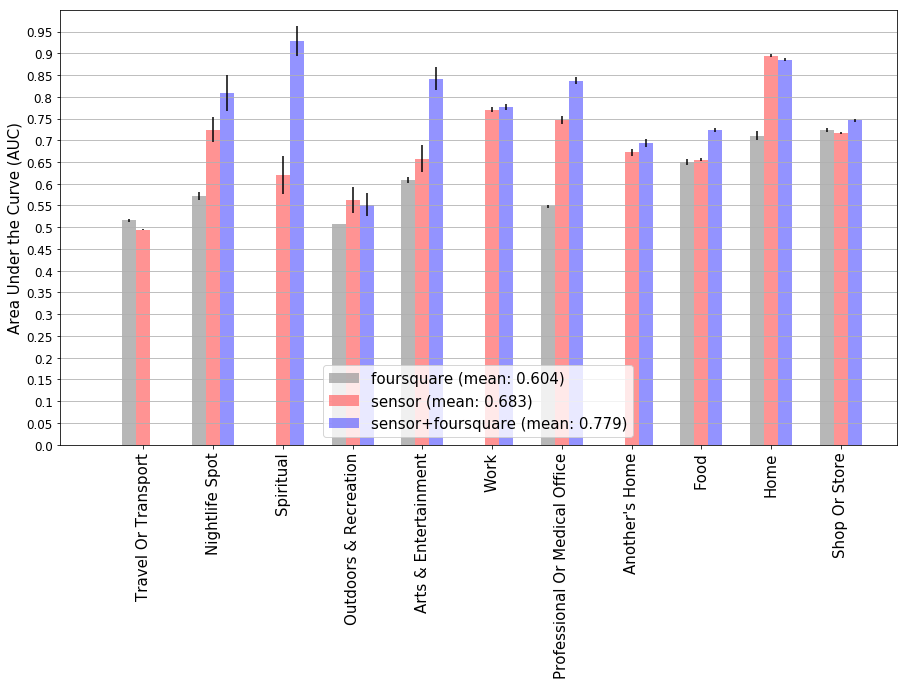

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,8))
w = 1/5.0
plt.bar(np.arange(0,state_top10.size,1), auc_mean_fsq, yerr=auc_ci_fsq, width=w, align='center',\
         color=(.6,.6,.6), alpha=0.7, ecolor=(0,0,0))
plt.bar(np.arange(w,state_top10.size+w,1), auc_mean_sensor, yerr=auc_ci_sensor, width=w, align='center', \
         color=(1,.4,.4), alpha=0.7, ecolor=(0,0,0))
plt.bar(np.arange(2*w,state_top10.size+2*w,1), auc_mean_all, yerr=auc_ci_all, width=w, align='center', \
         color=(.4,.4,1), alpha=0.7, ecolor=(0,0,0))
plt.legend(['foursquare (mean: {:.3f})'.format(np.nanmean(auc_mean_fsq)),\
            'sensor (mean: {:.3f})'.format(np.nanmean(auc_mean_sensor)),\
            'sensor+foursquare (mean: {:.3f})'.format(np.nanmean(auc_mean_all))], loc='lower center', fontsize=15)
plt.ylabel('Area Under the Curve (AUC)',fontsize=15,color=(0,0,0))
# removing extra words
xlabel = state_top10
for (i,xl) in enumerate(xlabel):
    label_broken = xl.split('(')
    xlabel[i] = label_broken[0]
    if len(label_broken)>1:
        xlabel[i] = xlabel[i][:-1]
plt.xticks(np.arange(w,state_top10.size+w,1), xlabel, fontsize=15, color=(0,0,0), rotation=90, ha='center');
plt.yticks(np.arange(0,1,.05), np.arange(0,1,.05), fontsize=12, color=(0,0,0))
axes = plt.gca()
axes.set_xlim([-1, len(state_top10)])
axes.set_ylim([0, 1])
axes.yaxis.grid()

print(auc_mean_all)
# print np.nanmean(auc_mean_sensor)
# print np.nanmean(auc_mean_all)


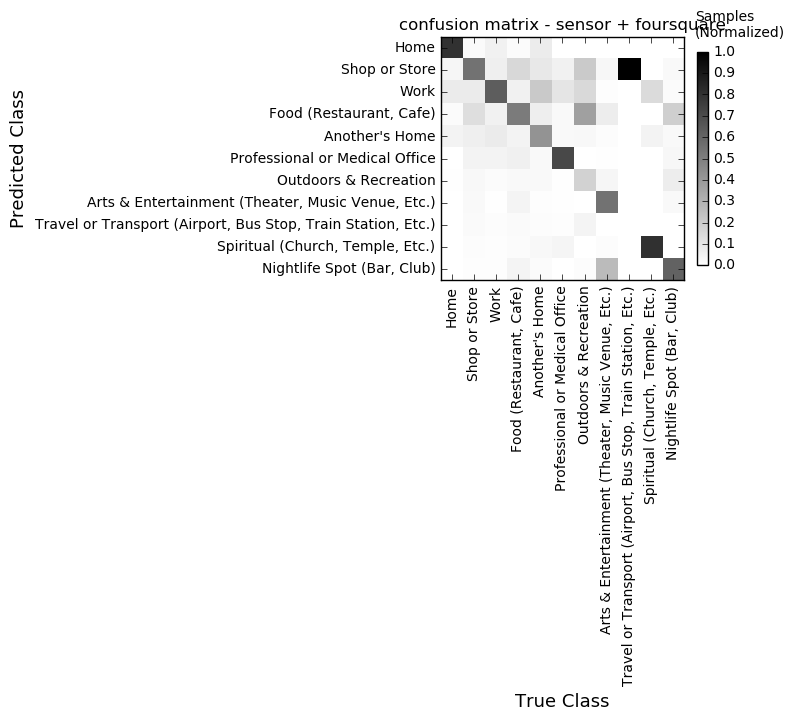

In [12]:
from soplata import plot_confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

conf = np.zeros([11,11])
for (i,c_row) in enumerate(conf_top10):
    for (j,c) in enumerate(c_row):
        conf[i,j] = np.sum(conf_top10[i][j])
cm_normalized = conf / conf.sum(axis=0)[np.newaxis,:]
plot_confusion_matrix(cm_normalized, state_top10, cmap=plt.cm.gray_r, \
                      vmin=0, vmax=np.max(cm_normalized), xsize=7, ysize=7)
plt.xlabel('True Class',fontsize=13)
plt.ylabel('Predicted Class',fontsize=13)
plt.colorbar(fraction=.04)
plt.text(11,-.5,'Samples\n(Normalized)')
plt.title('confusion matrix - sensor + foursquare')

tab = pd.DataFrame(columns=['ACC','SEN','SPEC'])
for i in range(11):
    tab.loc[i,'SEN'] = conf[i,i]/np.sum(conf[:,i])
    tab.loc[i,'SPEC'] = (np.sum(conf[:i,:i])+np.sum(conf[i+1:,i+1:])+np.sum(conf[:i,i+1:])+np.sum(conf[i+1:,:i]))/(np.sum(conf[:,:i])+np.sum(conf[:,i+1:]))
    tab.loc[i,'ACC'] = (conf[i,i]+np.sum(conf[:i,:i])+np.sum(conf[i+1:,i+1:])+np.sum(conf[:i,i+1:])+np.sum(conf[i+1:,:i]))/np.sum(conf)
# print tab
# print
# print tab.mean()

In [19]:
# tab
np.mean(tab)

ACC     0.939743
SEN     0.526844
SPEC    0.965308
dtype: float64

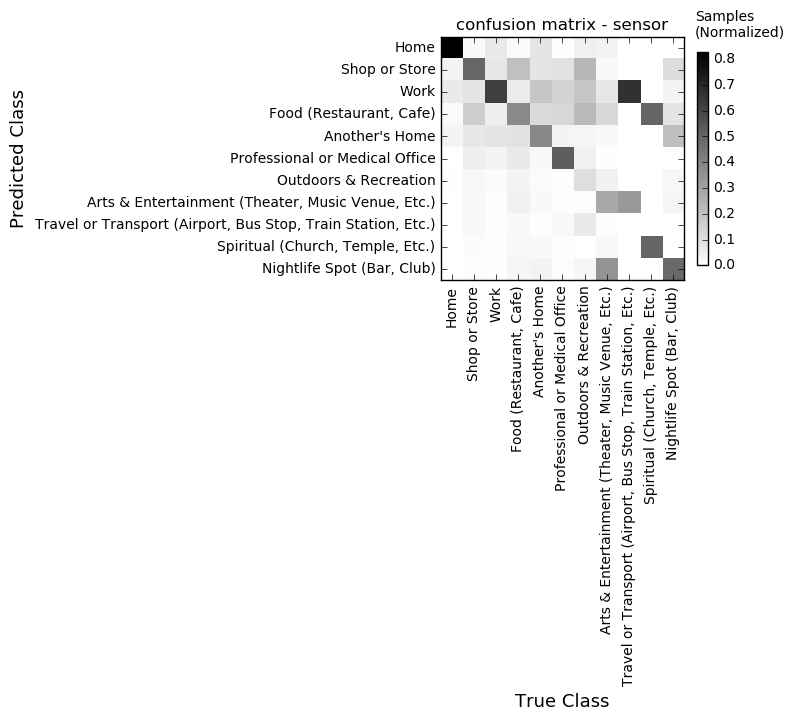

In [43]:
from soplata import plot_confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

conf = np.zeros([11,11])
for (i,c_row) in enumerate(conf_top10_sensor):
    for (j,c) in enumerate(c_row):
        conf[i,j] = np.sum(conf_top10_sensor[i][j])
cm_normalized = conf / conf.sum(axis=0)[np.newaxis,:]
plot_confusion_matrix(cm_normalized, state_top10, cmap=plt.cm.gray_r, \
                      vmin=0, vmax=np.max(cm_normalized), xsize=7, ysize=7)
plt.xlabel('True Class',fontsize=13)
plt.ylabel('Predicted Class',fontsize=13)
plt.colorbar(fraction=.04)
plt.text(11,-.5,'Samples\n(Normalized)')
plt.title('confusion matrix - sensor')

tab = pd.DataFrame(columns=['ACC','SEN','SPEC'])
for i in range(11):
    tab.loc[i,'SEN'] = conf[i,i]/np.sum(conf[:,i])
    tab.loc[i,'SPEC'] = (np.sum(conf[:i,:i])+np.sum(conf[i+1:,i+1:])+np.sum(conf[:i,i+1:])+np.sum(conf[i+1:,:i]))/(np.sum(conf[:,:i])+np.sum(conf[:,i+1:]))
    tab.loc[i,'ACC'] = (conf[i,i]+np.sum(conf[:i,:i])+np.sum(conf[i+1:,i+1:])+np.sum(conf[:i,i+1:])+np.sum(conf[i+1:,:i]))/np.sum(conf)


In [46]:
tab

,ACC,SEN,SPEC
0,0.903795,0.828513,0.963725
1,0.800995,0.497015,0.931087
2,0.881747,0.621784,0.920811
3,0.879359,0.384201,0.925583
4,0.919316,0.387874,0.937562
5,0.968643,0.523007,0.971451
6,0.983914,0.108974,0.98412
7,0.986649,0.28125,0.986922
8,0.988826,0,0.98883
9,0.990538,0.5,0.990541


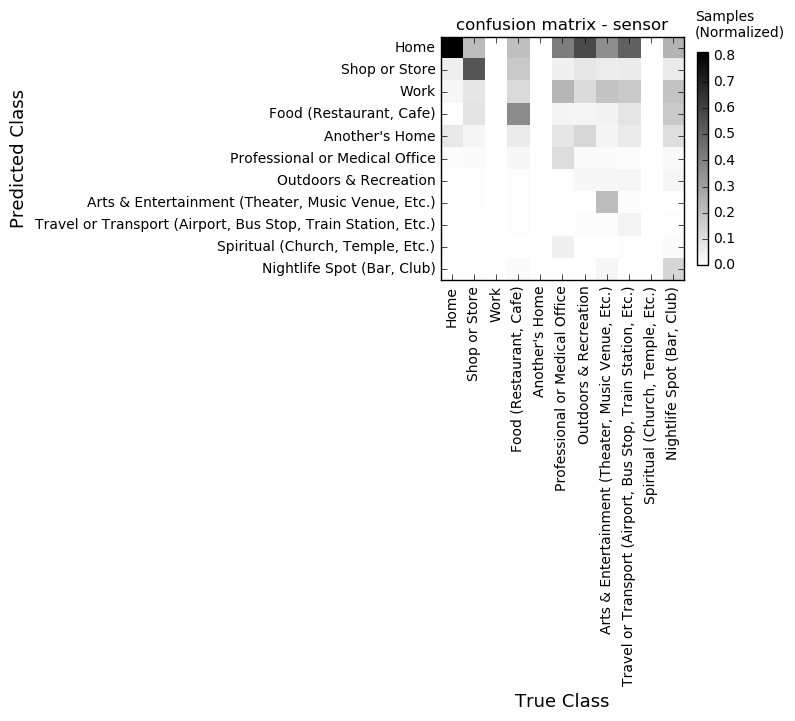

In [47]:
from soplata import plot_confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

conf = np.zeros([11,11])
for (i,c_row) in enumerate(conf_top10_foursquare):
    for (j,c) in enumerate(c_row):
        conf[i,j] = np.sum(conf_top10_foursquare[i][j])
cm_normalized = conf / conf.sum(axis=0)[np.newaxis,:]
plot_confusion_matrix(cm_normalized, state_top10, cmap=plt.cm.gray_r, \
                      vmin=0, vmax=np.nanmax(cm_normalized), xsize=7, ysize=7)
plt.xlabel('True Class',fontsize=13)
plt.ylabel('Predicted Class',fontsize=13)
plt.colorbar(fraction=.04)
plt.text(11,-.5,'Samples\n(Normalized)')
plt.title('confusion matrix - sensor')

tab = pd.DataFrame(columns=['ACC','SEN','SPEC'])
for i in range(11):
    tab.loc[i,'SEN'] = conf[i,i]/np.sum(conf[:,i])
    tab.loc[i,'SPEC'] = (np.sum(conf[:i,:i])+np.sum(conf[(i+1):,(i+1):])+np.sum(conf[:i,(i+1):])+np.sum(conf[(i+1):,:i]))/(np.sum(conf[:,:i])+np.sum(conf[:,(i+1):]))
    tab.loc[i,'ACC'] = (conf[i,i]+np.sum(conf[:i,:i])+np.sum(conf[(i+1):,(i+1):])+np.sum(conf[:i,(i+1):])+np.sum(conf[(i+1):,:i]))/np.sum(conf)


In [54]:
tab

,ACC,SEN,SPEC
0,0.627531,0.815078,0.619402
1,0.804446,0.539474,0.915206
2,0.874405,NaN,0.874405
3,0.87538,0.368408,0.94393
4,0.920954,NaN,0.920954
5,0.857309,0.112104,0.983024
6,0.682368,0.0268363,0.991112
7,0.974082,0.214608,0.994138
8,0.959183,0.0388287,0.992344
9,0.988976,NaN,0.988976
